<a href="https://colab.research.google.com/github/LesNEIGE/r_stastics/blob/master/15correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 상관분석

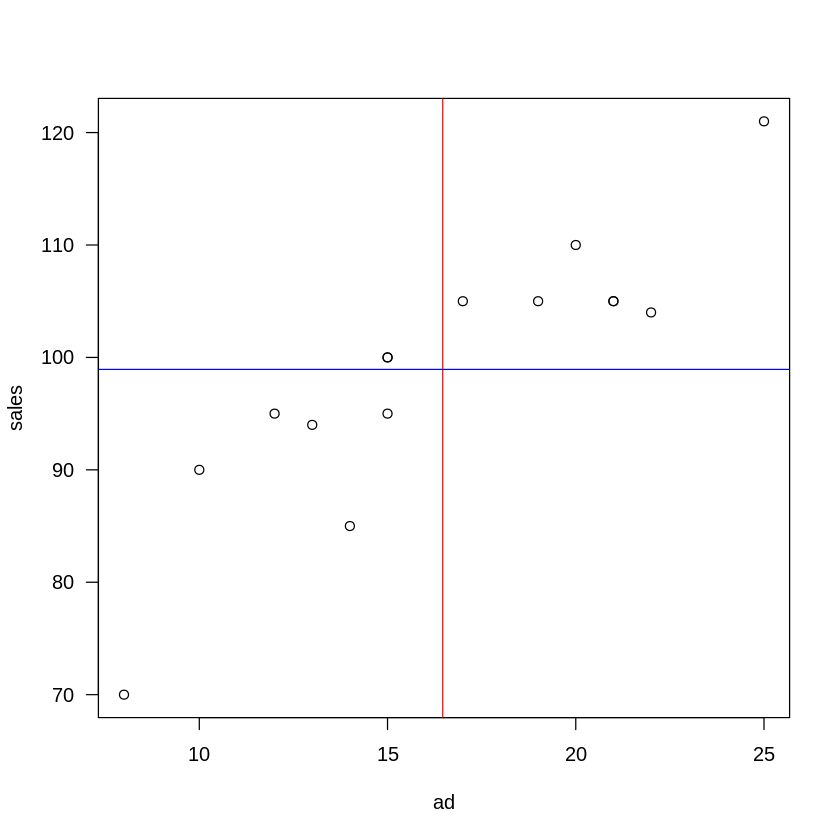

In [2]:
ad = c(13,8,10,15,12,15,14,15,17,19,20,21,22,21,25)
sales = c(94,70,90,100,95,100,85,95,105,105,110,105,104,105,121)

plot(ad, sales, las = 1)
abline(v = mean(ad), col = 'red')
abline(h = mean(sales), col = 'blue')

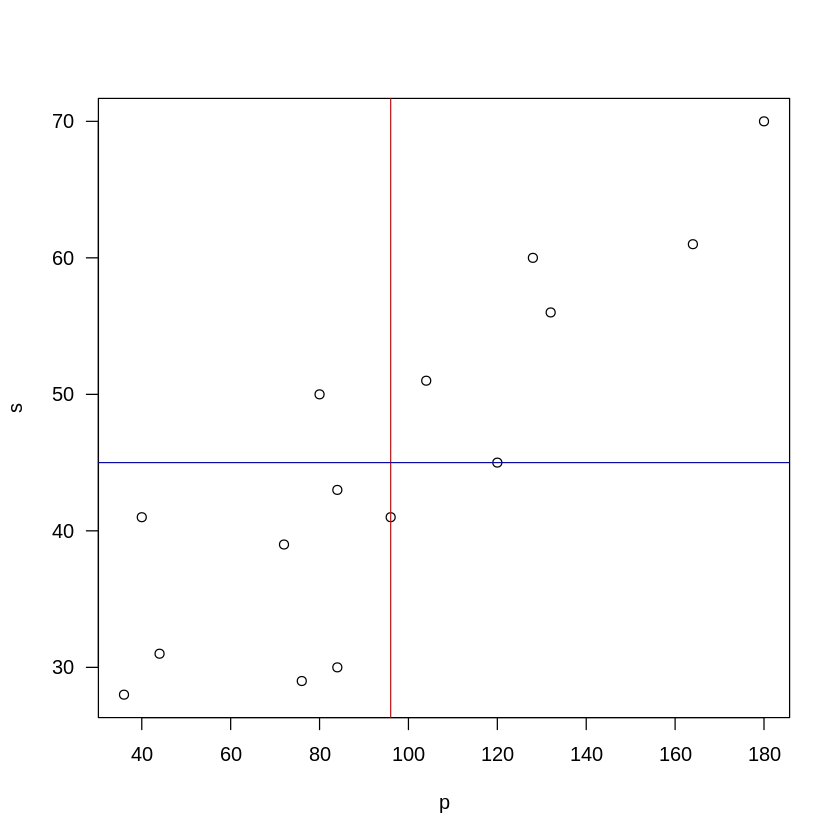

In [4]:
# 판매원 15명의 판촉횟수와 판매량 자료가 다음과 같을 때, 전화횟수에 따라 판매량 변화가 있는지 알아보시오.
p <- c(96,40,104,128,164,76,72,80,36,84,180,132,120,44,84)
s <- c(41,41,51,60,61,29,39,50,28,43,70,56,45,31,30)
plot(p, s, las = 1)
abline(v=mean(p), col='red')
abline(h=mean(s), col='blue')

In [ ]:
# 공분산, 상관계수 cov, cor
# cor함수에는 method라는 속성이 지원
# pearson (기본) :등간/비율척도, 정규성
# spearman : 순서척도, 비정규성
# kendall : 순서척도, 비정규성

In [6]:
cor(ad, sales)
cor(p, s)

[1] 0.8879209

[1] 0.8646318

In [ ]:
# applewood 자동차 판매데이터로 구매자 연령과 판매이익간의 상관계수 계산 & 상관분석

,Age,Profit,Location,Vehicle.Type,Previous
,<int>,<fct>,<fct>,<fct>,<int>
1,21,"$1,387",Tionesta,Sedan,0
2,23,"1,754",Sheffield,SUV,1
3,24,"1,817",Sheffield,Hybrid,1
4,25,"1,040",Sheffield,Compact,0
5,26,"1,273",Kane,Sedan,1
6,27,"1,529",Sheffield,Sedan,1


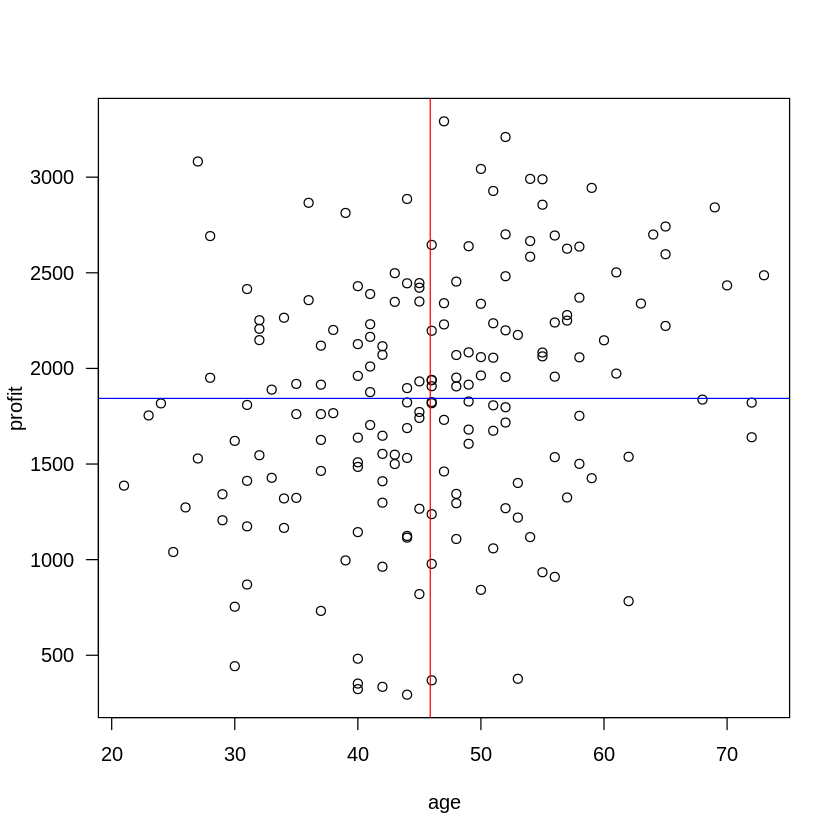

In [27]:
aw <- read.csv('https://raw.githubusercontent.com/LesNEIGE/r_stastics/master/datasets/applewood.txt', header = T, sep = '')
head(aw)

age <- aw$Age
profit <- aw$Profit
library(stringr)
profit <- str_remove_all(profit, '\\$')
profit <- str_remove_all(profit, ',')
profit <- as.integer(profit)
plot(age, profit, las = 1)
abline(v=mean(age), col='red')
abline(h=mean(profit), col='blue')

In [28]:
# 상관계수 범위에 따른 상관정도 해석 (마이너스도 같은의미)
# -0.1 ~ 0.1 : 상관관계 없음
# 0.1~ 0.3 : 약한 상관관계
# 0.3~ 0.7 : 강한 상관관계
# 0.7~ 1 : 매우강한 상관관계

cor(age, profit)

[1] 0.261529

tibble [574 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date    : Date[1:574], format: "1967-07-01" "1967-08-01" ...
 $ pce     : num [1:574] 507 510 516 512 517 ...
 $ pop     : num [1:574] 198712 198911 199113 199311 199498 ...
 $ psavert : num [1:574] 12.6 12.6 11.9 12.9 12.8 11.8 11.7 12.3 11.7 12.3 ...
 $ uempmed : num [1:574] 4.5 4.7 4.6 4.9 4.7 4.8 5.1 4.5 4.1 4.6 ...
 $ unemploy: num [1:574] 2944 2945 2958 3143 3066 ...


[1] 0.6145176

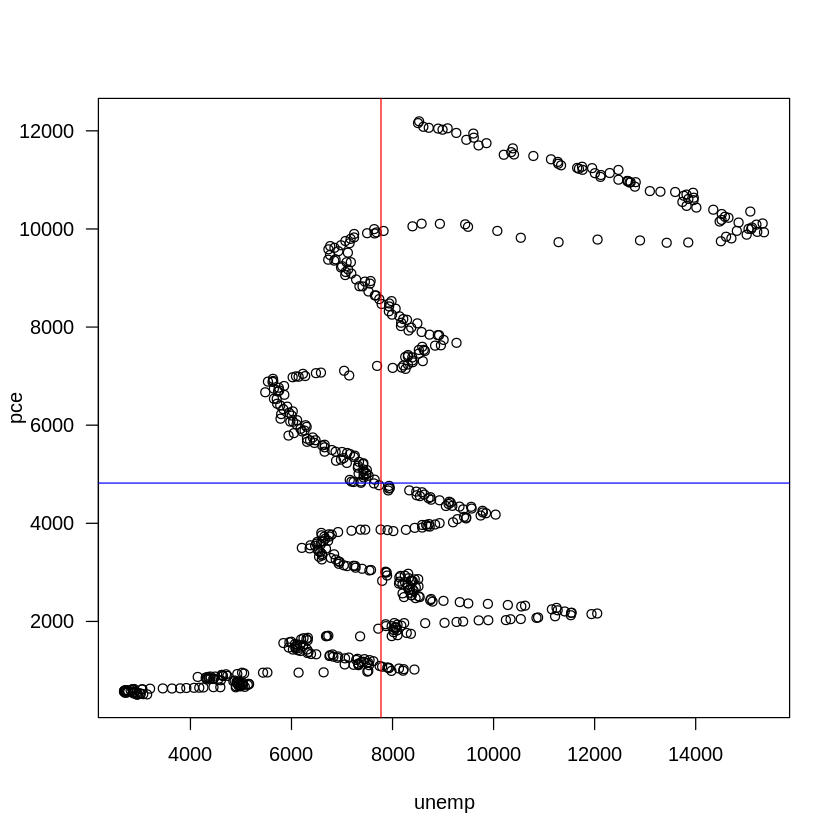

In [44]:
# ggplot2가 제공하는 데이터셋중
# economics 데이터를 이용해서
# 실업자수 unemploy, 개인소비지출pce, 개인저축율psavert의 상관관계 분석
library(ggplot2)
str(economics)
unemp <- economics$unemploy
pce <- economics$pce
psave <- economics$psavert

plot(unemp, pce, las = 1)
abline(v=mean(unemp), col = 'red')
abline(h=mean(pce), col = 'blue')
cor(unemp, pce)

[1] -0.3093769

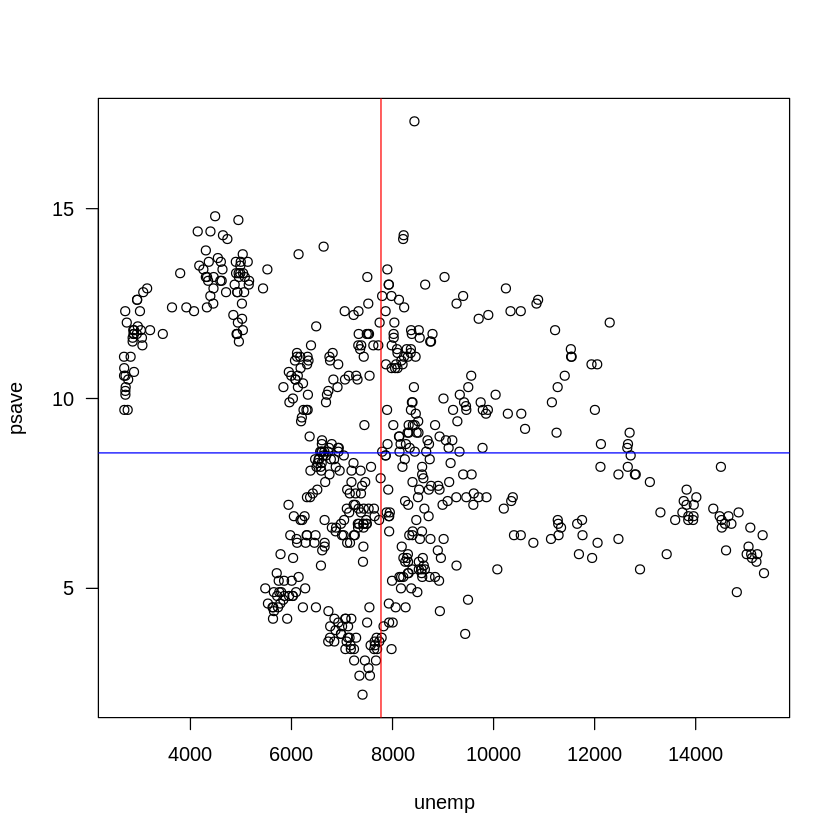

In [45]:
plot(unemp, psave, las = 1)
abline(v=mean(unemp), col = 'red')
abline(h=mean(psave), col = 'blue')
cor(unemp, psave)

In [46]:
# MASS 패키지의 Cars93 데이터셋을 이용해서
# 고속도로 highway / 시내 city 연비와
# 자체중량 weight의 상관관계를 알아보자.
library(MASS)
head(Cars93)
str(Cars93)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,⋯,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,⋯,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,⋯,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,⋯,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,⋯,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,⋯,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,⋯,6,189,105,69,41,28.0,16,2880,USA,Buick Century


'data.frame':	93 obs. of  27 variables:
 $ Manufacturer      : Factor w/ 32 levels "Acura","Audi",..: 1 1 2 2 3 4 4 4 4 5 ...
 $ Model             : Factor w/ 93 levels "100","190E","240",..: 49 56 9 1 6 24 54 74 73 35 ...
 $ Type              : Factor w/ 6 levels "Compact","Large",..: 4 3 1 3 3 3 2 2 3 2 ...
 $ Min.Price         : num  12.9 29.2 25.9 30.8 23.7 14.2 19.9 22.6 26.3 33 ...
 $ Price             : num  15.9 33.9 29.1 37.7 30 15.7 20.8 23.7 26.3 34.7 ...
 $ Max.Price         : num  18.8 38.7 32.3 44.6 36.2 17.3 21.7 24.9 26.3 36.3 ...
 $ MPG.city          : int  25 18 20 19 22 22 19 16 19 16 ...
 $ MPG.highway       : int  31 25 26 26 30 31 28 25 27 25 ...
 $ AirBags           : Factor w/ 3 levels "Driver & Passenger",..: 3 1 2 1 2 2 2 2 2 2 ...
 $ DriveTrain        : Factor w/ 3 levels "4WD","Front",..: 2 2 2 2 3 2 2 3 2 2 ...
 $ Cylinders         : Factor w/ 6 levels "3","4","5","6",..: 2 4 4 4 2 2 4 4 4 5 ...
 $ EngineSize        : num  1.8 3.2 2.8 2.8 3.5 2.2 3.8 5.7 3.

[1] -0.8106581

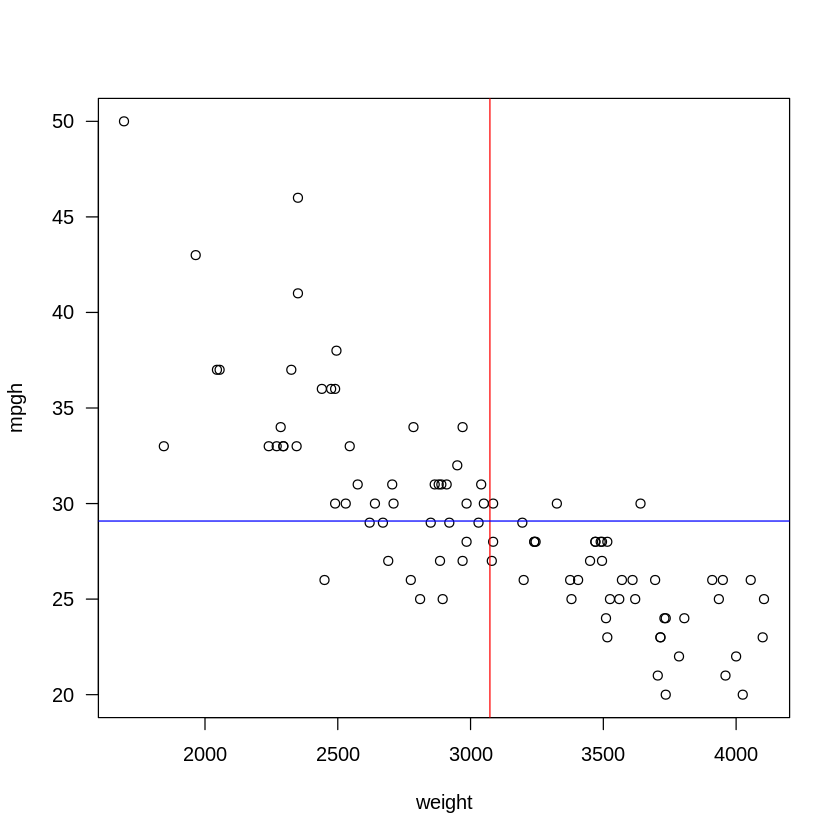

In [47]:
mpgc <- Cars93$MPG.city
mpgh <- Cars93$MPG.highway
weight <- Cars93$Weight

plot(weight, mpgh , las =1)
abline(v=mean(weight), col = 'red')
abline(h=mean(mpgh), col = 'blue')
cor(weight, mpgh)

[1] -0.8431385

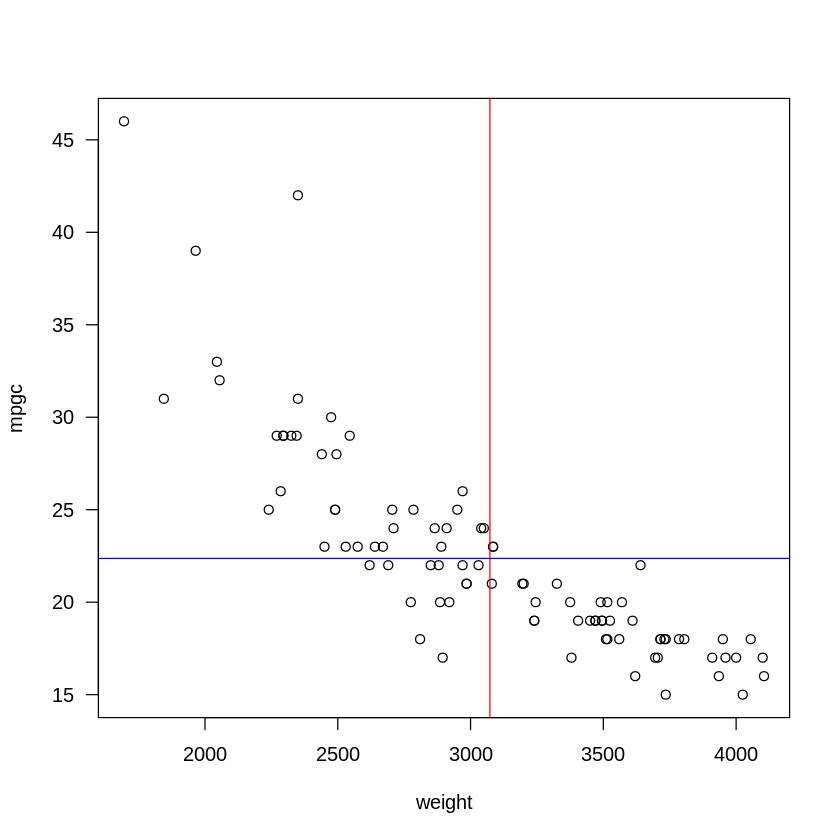

In [48]:
plot(weight, mpgc , las =1)
abline(v=mean(weight), col = 'red')
abline(h=mean(mpgc), col = 'blue')
cor(weight, mpgc)

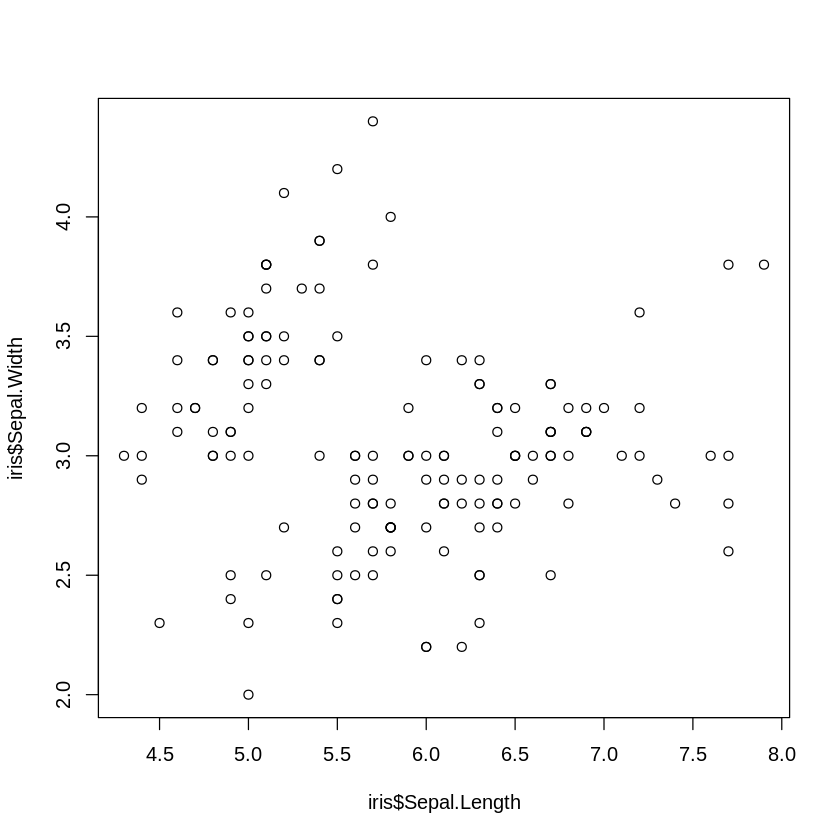

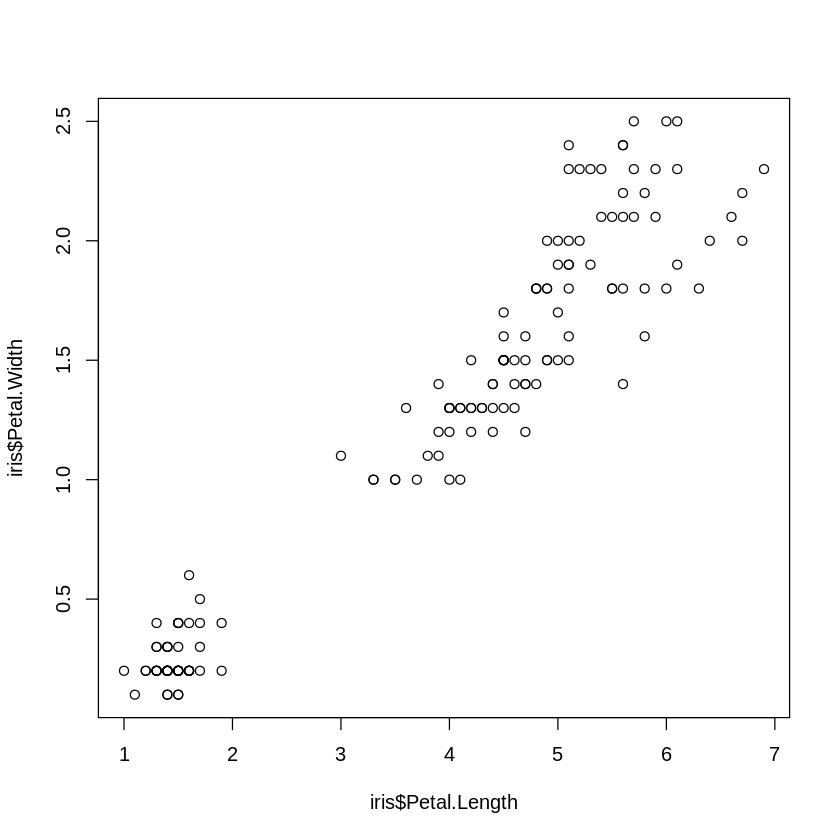

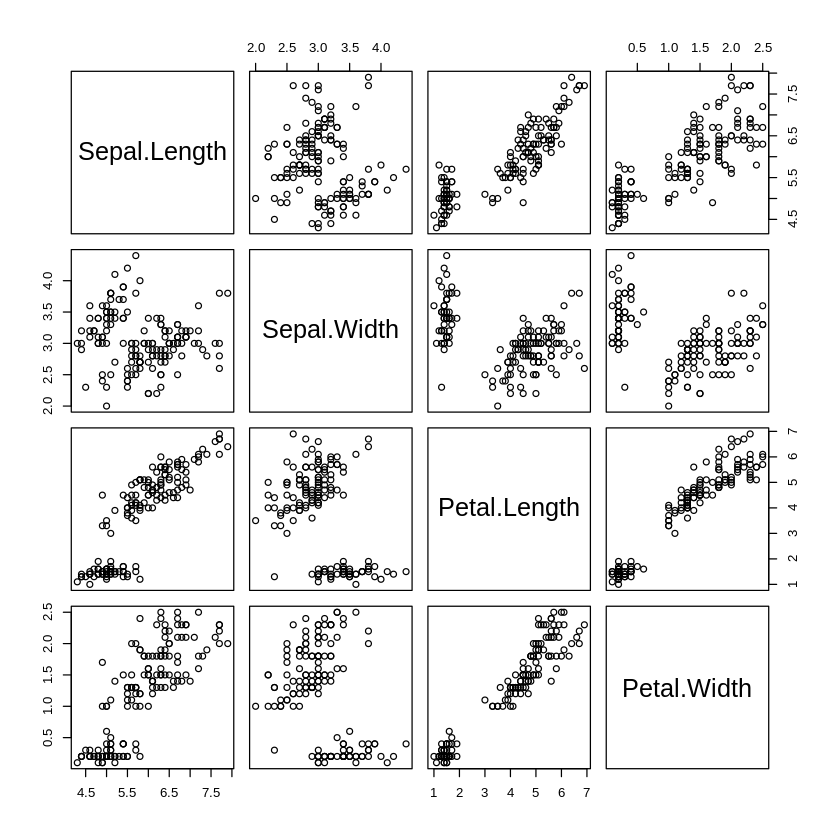

In [53]:
# 상관행렬
# 여러변수의 상관관계를 한 번에 알아보고자 하는 경우
# corrplot 함수를 이용하면 됨

# library(corrplot)

# iris 데이터셋에 대해 개별변수 상관분석 시각화

plot(iris$Sepal.Length, iris$Sepal.Width)
plot(iris$Petal.Length, iris$Petal.Width)

# plot 함수를 이용해서 상관행렬 시각화

plot(iris[, 1:4])

In [57]:
# corrplot
# 상관관계 정도를 한 눈에 보기 쉽게 그래프로 그려줌
# 빨강색 : 음의 상관관계
# 파랑색 : 양의 상관관계

install.packages('corrplot')
library(corrplot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



In [ ]:
cor <- cor(iris[, 1:4])
corrplot(cor)
corrplot(cor, method = 'square')
corrplot(cor, method = 'pie')
corrplot(cor, method = 'color')
corrplot(cor, method = 'shade')
corrplot(cor, method = 'ellipse')
corrplot(cor, method = 'number')

'data.frame':	93 obs. of  3 variables:
 $ weight: int  2705 3560 3375 3405 3640 2880 3470 4105 3495 3620 ...
 $ mpgc  : int  25 18 20 19 22 22 19 16 19 16 ...
 $ mpgh  : int  31 25 26 26 30 31 28 25 27 25 ...


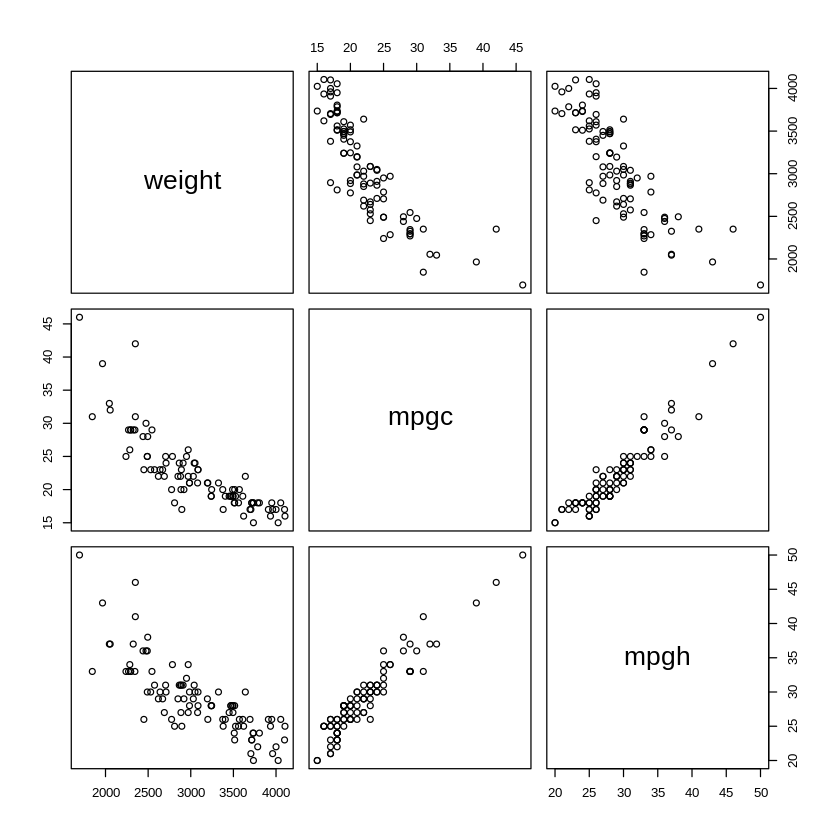

In [67]:
# MASS 패키지의 Cars93 데이터셋을 이용해서
# 고속도로 / 시내 연비와 관련된 변수들의 
# 상관관계를 corrplot함수로 확인

fuel <- data.frame(weight, mpgc, mpgh)
str(fuel)
plot(fuel)

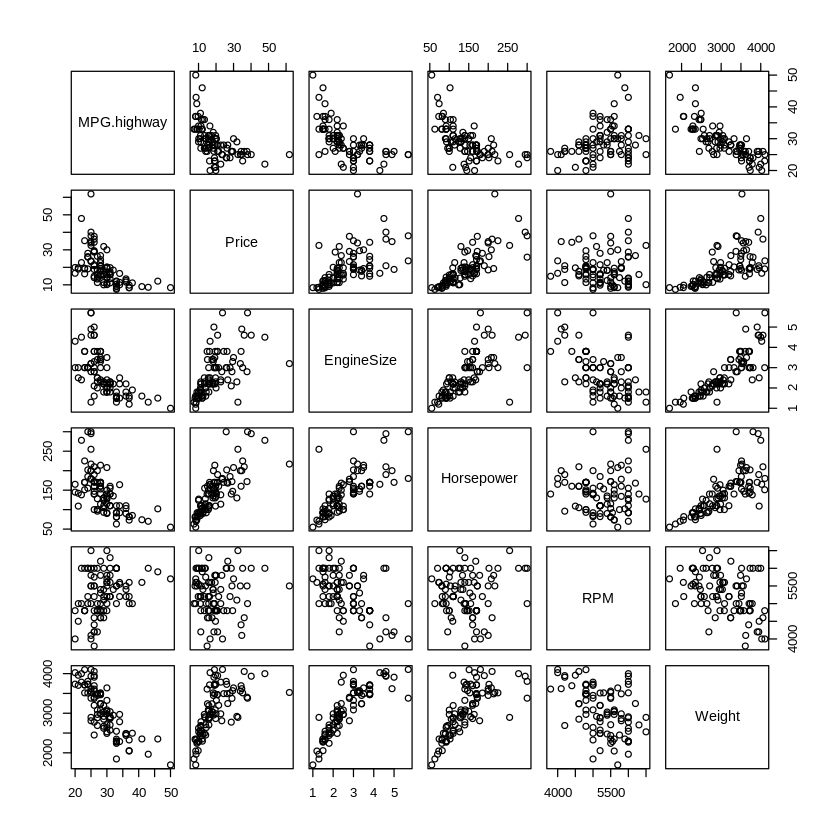

,MPG.highway,Price,EngineSize,Horsepower,RPM,Weight
MPG.highway,1.0000000,-0.560680362,-0.6267946,-0.61904368,0.313468728,-0.8106581
Price,-0.5606804,1.000000000,0.5974254,0.78821758,-0.004954931,0.6471790
EngineSize,-0.6267946,0.597425392,1.0000000,0.73211973,-0.547897805,0.8450753
Horsepower,-0.6190437,0.788217578,0.7321197,1.00000000,0.036688212,0.7387975
RPM,0.3134687,-0.004954931,-0.5478978,0.03668821,1.000000000,-0.4279315
Weight,-0.8106581,0.647179005,0.8450753,0.73879752,-0.427931473,1.0000000


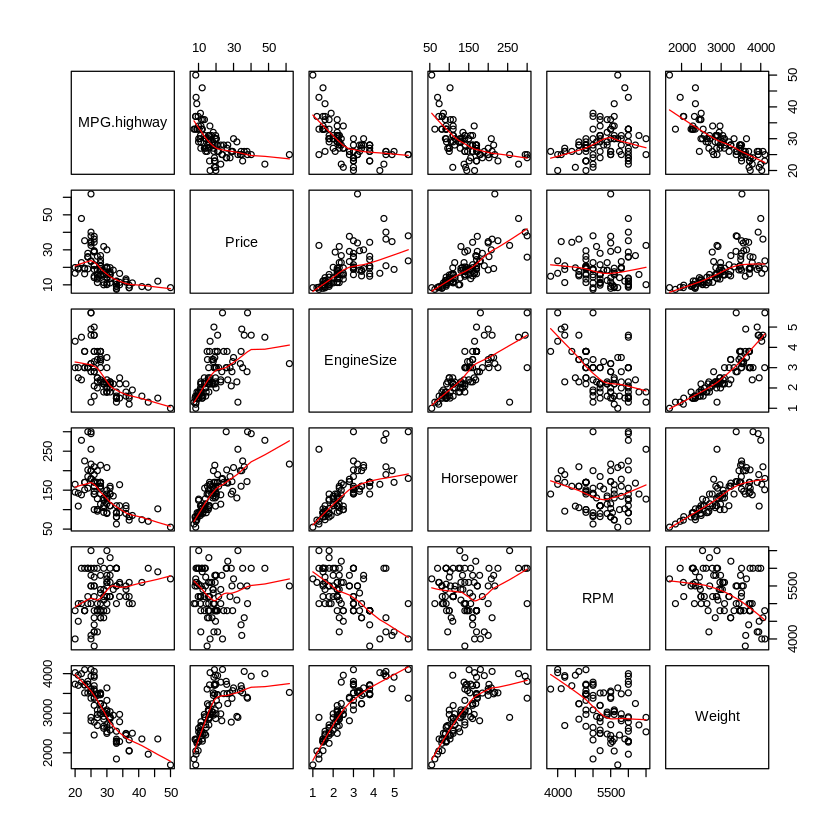

In [74]:
# 고속도로 연비 vs 가격, 엔진 크기 ㅡ 마력, RPM, 중량
hwmpg <-Cars93[,c(8,5,12:14,25)]
plot(hwmpg)
pairs(hwmpg, panel = panel.smooth) # 추세선 함수
cor <- cor(hwmpg)
cor # 상관계수 행렬


In [ ]:
corrplot(cor, method = 'square')
corrplot(cor, method = 'pie')
corrplot(cor, method = 'number')

In [77]:
# 좀 더 고급 상관관계 시각화
install.packages('PerformanceAnalytics')
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend




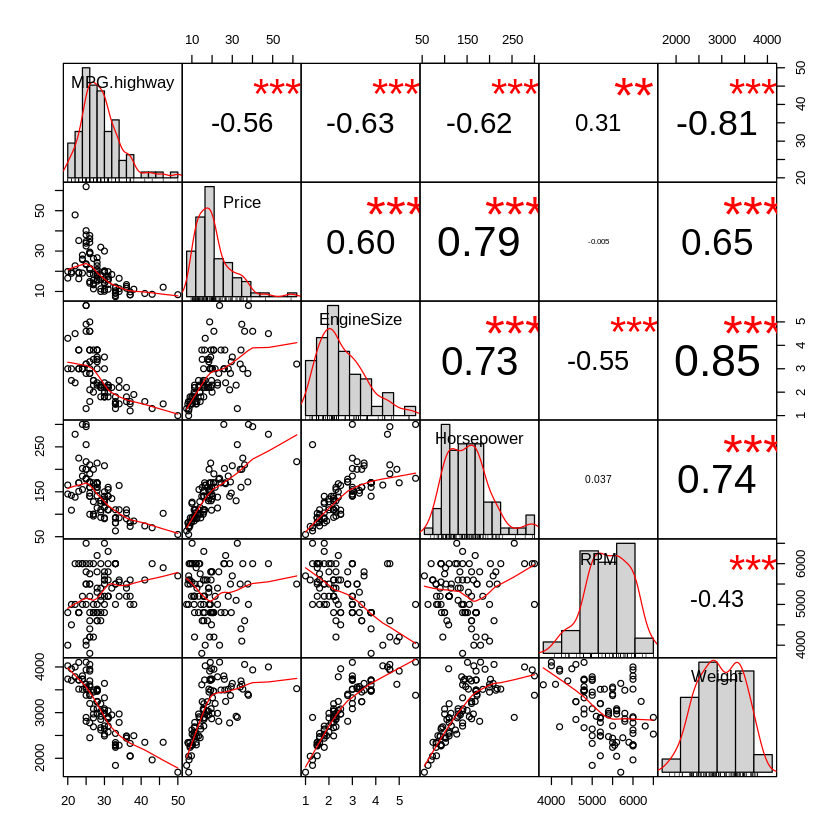

In [78]:
chart.Correlation(hwmpg, histogram = T, pch = 19)

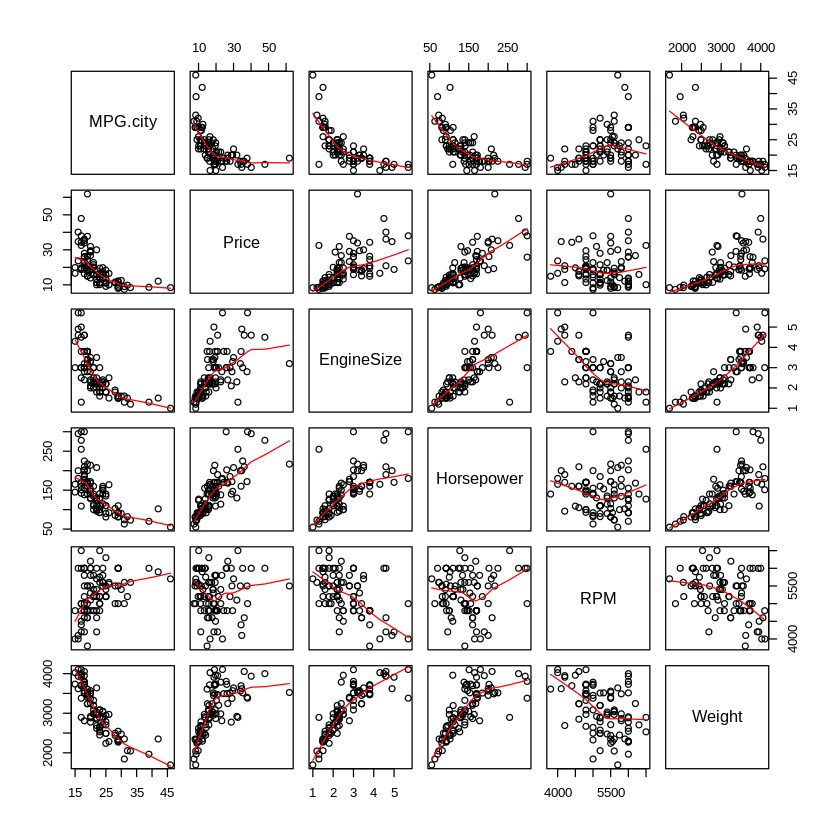

In [81]:
# 시내 연비 vs 가격, 엔진 크기 ㅡ 마력, RPM, 중량
ctympg <-Cars93[,c(7,5,12:14,25)]
pairs(ctympg, panel = panel.smooth)

In [ ]:
cor <- cor(ctympg)
cor
corrplot(cor, method = 'ellipse')
corrplot(cor, method = 'number')

chart.Correlation(ctympg, histogram = T, pch = 19)

In [ ]:
# 상관계수 유의성 검정
# 독립변수와 종속변수가 서로 관련없는데
# 상관계수가 양/음 으로 나온것은 아닌지?
# 유의수준 0.05를 기준으로 가설검정 실시
# R에서는 cor.test 함수 사용
# 상관계수의 검정통계량은 t분포를 이용


In [84]:
# 광고비와 매출액에 대한 상관계수의 유의성 검정
options(scipen = 100)
cor.test(ad, sales)
# 유의확률이 유의수준보다 작으므로 대립가설 채택



	Pearson's product-moment correlation

data:  ad and sales
t = 6.9597, df = 13, p-value = 0.000009921
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6890898 0.9624256
sample estimates:
      cor 
0.8879209 


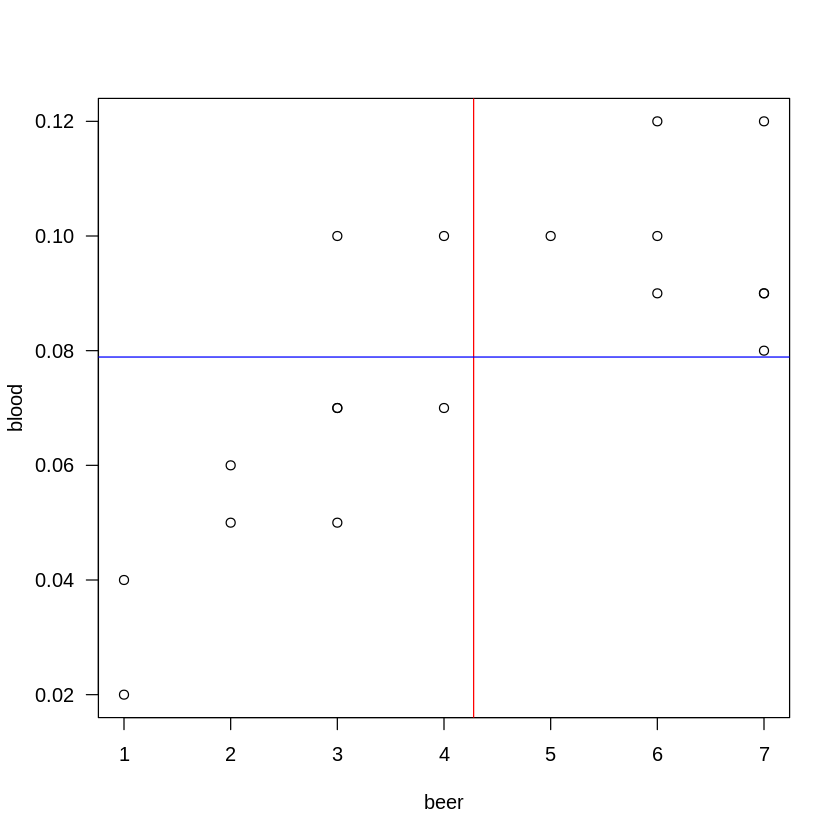

In [98]:
# 어느대학교 학생회에서 학생들이 마시는 맥주와 혈중알콩농도 사이의 관계를 알고자 함.
# 18명의 학생을 표본추출하여 맥주캔 500ml를 마시게 하고
# 30분후 경찰서에서 혈중알콜농도 측정.
# 시음량과 알콜농도간의 상관관계를 알아보자.

beer <- c(6,7,7,4,5,3,3,6,6,3,3,7,1,4,2,7,2,1)
blood <- c(0.1, 0.09, 0.09, 0.1, 0.1, 0.07, 0.1,0.12,0.09,0.07, 0.05, 0.08, 0.04, 0.07, 0.06, 0.12, 0.05, 0.02)
plot(beer, blood, las = 1)
abline(v=mean(beer), col = 'red')
abline(h=mean(blood), col = 'blue')

,beer,blood
beer,1.0000000,0.7787953
blood,0.7787953,1.0000000


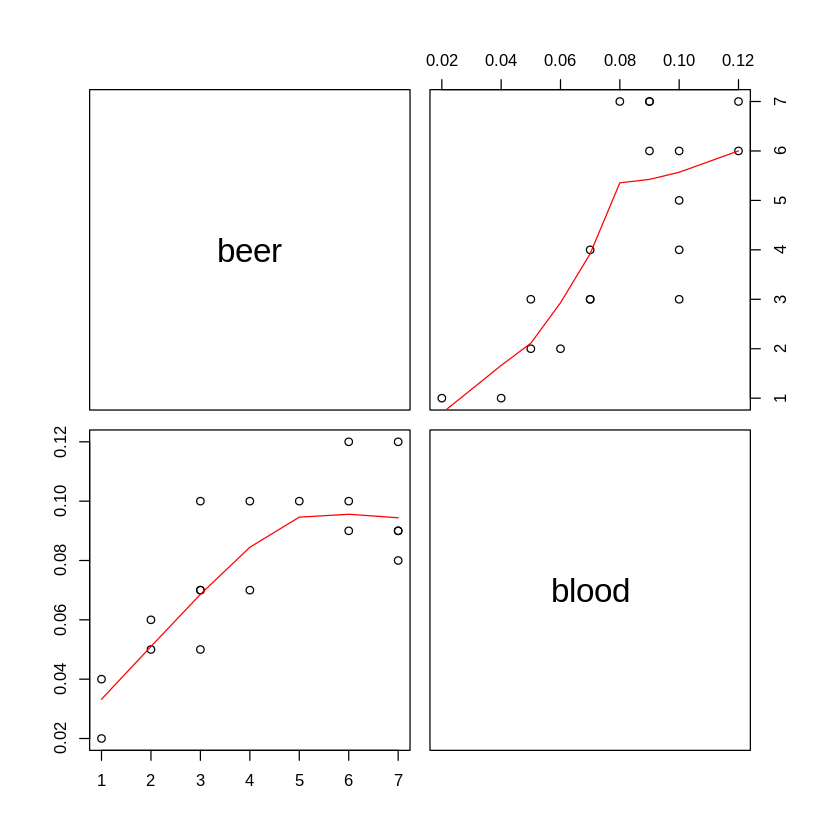

In [100]:
acohol <- data.frame(beer, blood)
pairs(alcohol, panel = panel.smooth)
cor <- cor(alcohol)
cor

In [ ]:
corrplot(cor, method = 'ellipse') # 상관계수 cor를 넣어줘야함
corrplot(cor, method = 'number')

chart.Correlation(alcohol, histogram = T, pch = 19)
cor.test(beer, blood)